# Chapter 4: Activation Functions



In Chapter 3, you have seen how a neural network makes accurate predictions on a linear relation between the input and the output. That is impressive, but we could have done it with a linear regression and achieved similar results. You may wonder, what’s the advantage of neural networks?

Neural networks are function approximators. Feed the model with enough data, it can figure out the relation between any inputs and outputs even if the relation is nonlinear and very complicated. Or even if we human being don’t know the exact functional form between the two. 






After this chapter, you'll know that we need activation functions to model a nonlinear relationship. You'll create an animation to show how the ReLU activation function creates nonlinearity, as in the left side of the ***gif*** below.
<img src="https://gattonweb.uky.edu/faculty/lium/ml/relusigmoid.gif" />
You'll also learn why we need the sigmoid activation function in binary classifications: it takes in a number between $-\infty$ and $\infty$ and squashes it so the output is between 0 and 1, which can in turn be interpreted as the probability of an event. Just like the right side of the ***gif*** above. 

***
$\mathbf{\text{Create a subfolder for files in Chapter 4}}$<br>
***
We'll put all files for Chapter 4 in a subfolder /files/ch04. The code in the cell below will accomplish that.

***

In [1]:
import os

os.makedirs("files/ch04", exist_ok=True)

## 1. Why Do We Need Activation Functions?
Activation functions help us create nonlinear relations between the input and output. Without them, we can only approximate linear relations. It doesn't matter how many hidden layers we add to the neural network, we cannot achieve a nonlinear relationship. 

To illustrate the point, let's try to train a deep neural network to learn the relationship between $x$ and $y=sin(x)$. The structure of the neural network I use has two hidden layers, with 7 and 5 neurons, respectively, with a diagram as generated with the code in the cell below. You'll see that without activation functions, the neural network cannot learn a nonlinear relationship: the linear transformation of a linear relationship is still linear.

We then add in the ReLU activation function in the layers in the neural network. The model successfully generates a nonlinear relationship between inputs and outputs. 

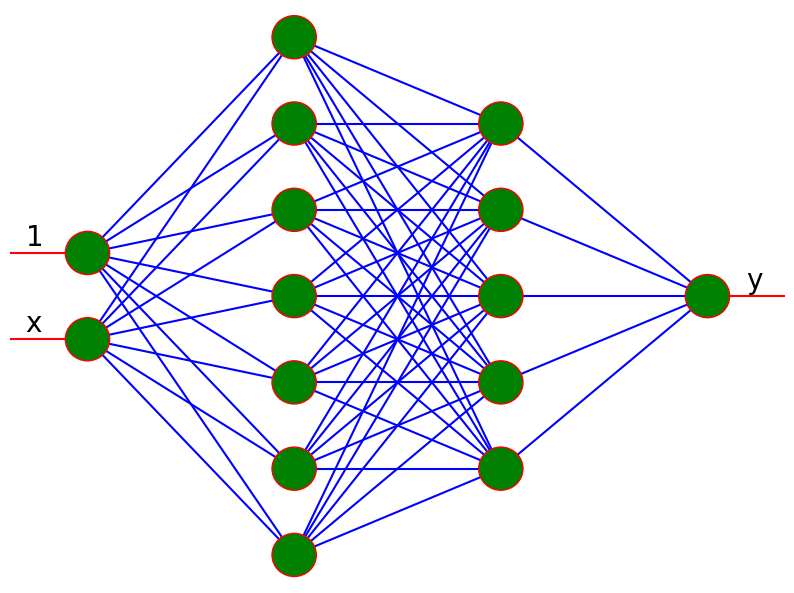

In [3]:
'''
this script was borrowed heavily from Colin Raffel's repo below on how to draw a diagram
of a neural network: https://gist.github.com/craffel/2d727968c3aaebd10359
'''
import matplotlib.pyplot as plt

layer_sizes = [2, 7, 5, 1]

n_layers = len(layer_sizes)

fig = plt.figure(figsize=(10,7.6), dpi=100)

ax=fig.gca()
ax.axis('off')
ax.set_ylim(0.12,0.88)
ax.set_xlim(0,1)
left=0.1
right=0.9 
bottom=0.1
top=0.9

v_spacing = (top - bottom)/float(max(layer_sizes))
h_spacing = (right - left)/float(len(layer_sizes) - 1)

for n, layer_size in enumerate(layer_sizes):
    layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
    #plt.arrow(h_spacing + left, layer_top, 0.012, 0,  lw =0.1)
    for m in range(layer_size):
        circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                            color='green', ec='r', zorder=4)
        ax.add_artist(circle)

# add input lines
    if n==0:
        for m in range(layer_size):
            line = plt.Line2D([n*h_spacing , n*h_spacing + left],
                              [layer_top - m*v_spacing, layer_top - m*v_spacing], c='r')
            ax.add_artist(line) 
            if m==0:
                plt.text(x=n*h_spacing + 0.2*left, y=layer_top - m*v_spacing+0.01, fontsize=20, color="k", s=f"1")
            else:
                plt.text(x=n*h_spacing + 0.2*left, y=layer_top - m*v_spacing+0.01, fontsize=20, color="k", s=f"x")

# add output lines
    if n==len(layer_sizes)-1:
        for m in range(layer_size):
            
            line = plt.Line2D([n*h_spacing + left, n*h_spacing + 2*left],
                              [layer_top - m*v_spacing, layer_top - m*v_spacing], c='r')
            ax.add_artist(line) 
            plt.text(x=n*h_spacing + 1.5*left, y=layer_top - m*v_spacing+0.01, fontsize=20, color="k", s=f"y")


# Edges
for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
    layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
    layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
    for m in range(layer_size_a):
        for o in range(layer_size_b):
            line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                              [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='blue')
            ax.add_artist(line)
           
fig.savefig('files/ch04/dnn-sin.png')   


### 1.1. Try to Learn the Sine Functional Form Without Activation Functions
First, we create a deep neural network and feed it with inputs and outputs that have a true relationship of $y=sin(X)$. We don't use any activation functions in any of the layers.  

The code below crates a deep neural network using the ***tensorflow*** library. The X values are 1000 data points between -5 and 5. The y values are generated as a function of X: $y=sin(X)$. We then train the model 150 epochs.

In [3]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

model = Sequential()
model.add(Dense(7, input_dim=1))
model.add(Dense(5))
model.add(Dense(1))

model.compile(optimizer=Adam(),loss='mse')

# Generate 1000 numbers in [-5,5]
X = np.linspace(-5,5,1000)
# Gnerate y as sine X
y = np.sin(X)

# Train the model using the X, y as inputs
hist = model.fit(X, y, epochs= 150, verbose=1)

Epoch 1/150
32/32 [==============================] - 0s 1ms/step - loss: 0.5501
Epoch 2/150
32/32 [==============================] - 0s 740us/step - loss: 0.5011
Epoch 3/150
32/32 [==============================] - 0s 759us/step - loss: 0.5011
Epoch 4/150
32/32 [==============================] - 0s 727us/step - loss: 0.5014
Epoch 5/150
32/32 [==============================] - 0s 708us/step - loss: 0.5032
Epoch 6/150
32/32 [==============================] - 0s 643us/step - loss: 0.5010
Epoch 7/150
32/32 [==============================] - 0s 661us/step - loss: 0.5024
Epoch 8/150
32/32 [==============================] - 0s 676us/step - loss: 0.5013
Epoch 9/150
32/32 [==============================] - 0s 708us/step - loss: 0.5017
Epoch 10/150
32/32 [==============================] - 0s 682us/step - loss: 0.5026
Epoch 11/150
32/32 [==============================] - 0s 698us/step - loss: 0.5042
Epoch 12/150
32/32 [==============================] - 0s 629us/step - loss: 0.5014
Epoch 13/150
32

Below, you can view the value of the loss function in the training process. 

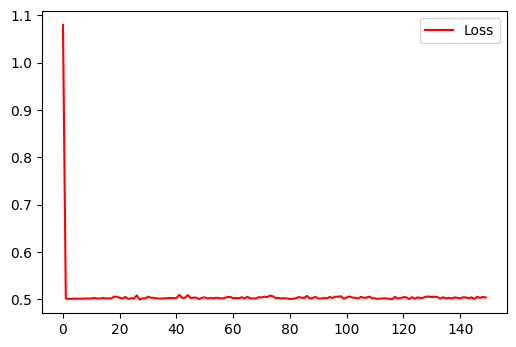

In [7]:
# View the loss through the training process
fig = plt.figure(dpi=100)
plt.plot(hist.history["loss"],label='Loss',color="r")
plt.legend()
plt.show()

Next, we'll create an out of sample testing dataset

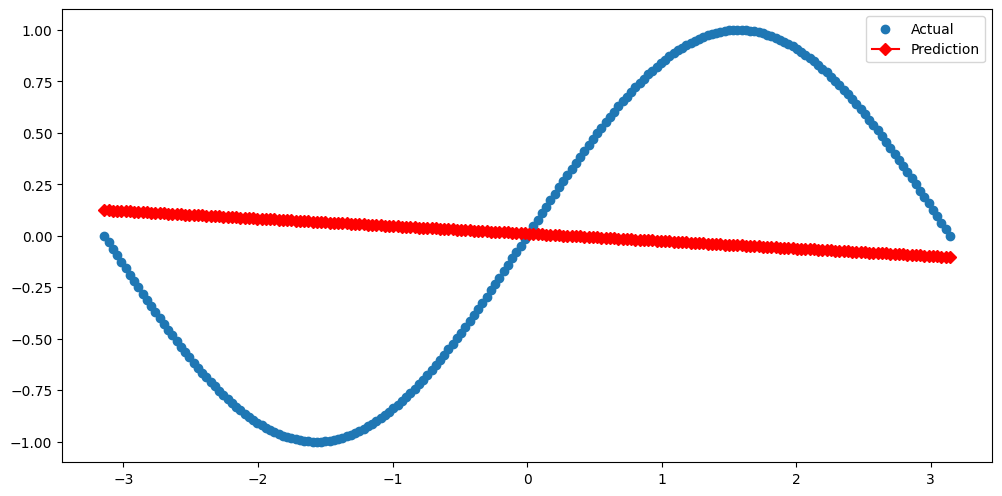

In [8]:
# Make predictions on the test dataset
X_test = np.linspace(-np.pi,np.pi,200)
y_test = np.sin(X_test)
pred = model.predict(X_test)

# Compare the actual y value and the prediction
fig = plt.figure(figsize=(12,6), dpi=100)
plt.scatter(X_test,y_test,label='Actual')
plt.plot(X_test,pred,label='Prediction',marker="D",color="r")
plt.legend()
plt.show()

As you can see above, the predictions (red dots) form a straight line, while the true relation is a sine curve. 

***
$\mathbf{\text{Why is the predicted relation still linear with multiple layers?}}$<br>
***
Without an activation function, each layer of neurons is simply a linear transformation of the inputs. We cannot generate a nonlinear relation even if we add more layers. Why? Because the linear transformation of a linear relation is still linear. 

Here is an intuitive illustration of why a linear transformation of a linear relation is still linear. Suppose $y$ is a function of $x$, and $z$ is a function of $y$, like so $$y=f(x)$$ $$z=g(y)$$. If both $f(.)$ and $g(.)$ are linear, we have $$y=w_f*x+b_f$$ $$z=w_g*y+b_g$$ where $w_f$, $b_f$, $w_g$, and $b_g$ are all constants. Then we have $$z=w_g*(w_f*x+b_f)+b_g=w_gw_f*x+w_gb_f+b_g$$

which shows $z$ is still a linear function of $x$.



***

### 1.2. The ReLu Activation Function
ReLu is short for rectified linear activation function. It returns the original value if it’s positive, and 0 otherwise. It’s widely used in many neural networks, and you’ll see it in this book more often than any other type of activation functions. 

The following script plots the ReLU activation function in the range of -6 to 6. 

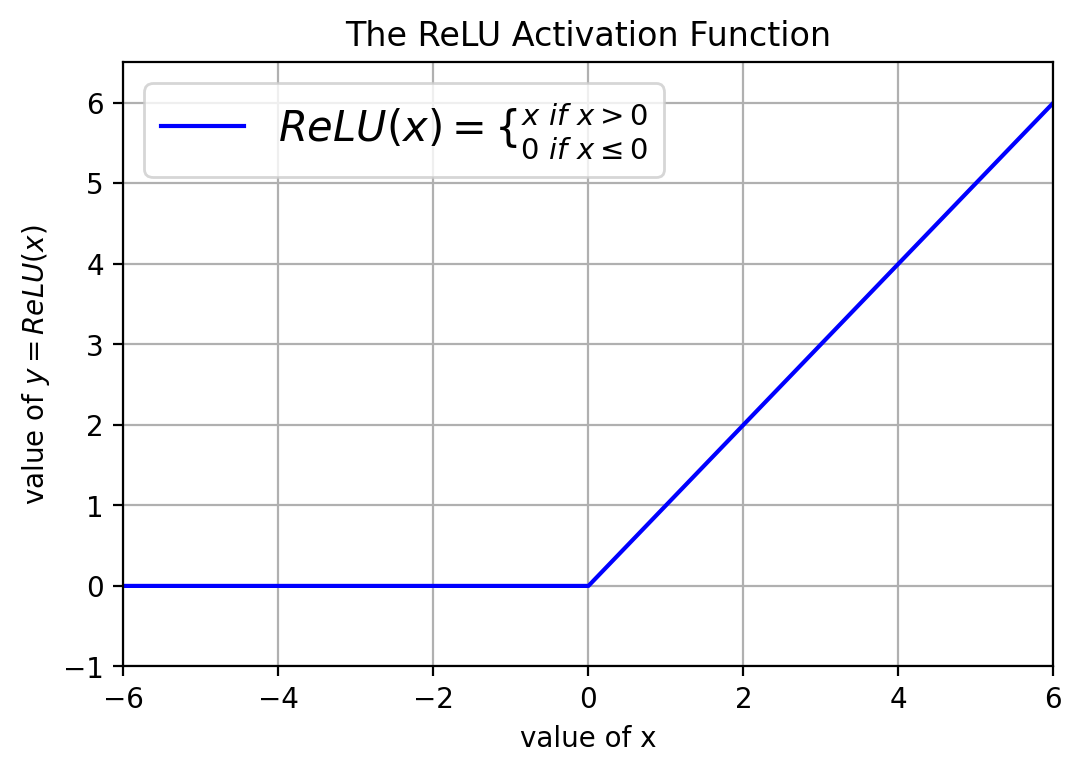

In [10]:
import numpy as np
import matplotlib.pyplot as plt

xs = np.linspace(-6,6,31)

def relu(x):
    y=np.zeros(len(x))
    for i in range(len(x)):
        if x[i]>0:
            y[i]=x[i]
    return y

ys=relu(xs)  

# Plot the ReLu function
fig, ax = plt.subplots(dpi=200)
plt.xlim(-6,6)
plt.ylim(-1,6.5)
plt.grid()
plt.plot(xs, ys, color = 'blue')  
plt.legend([r'$ ReLU(x)=\{\genfrac{}{}{0}{}{x\ if \ x>0}{0\ if \ x\leq 0}$']
           ,fontsize=15)    
plt.xlabel("value of x")
plt.ylabel("value of $y=ReLU(x)$")
plt.title("The ReLU Activation Function")    
plt.savefig("files/ch04/relu.png")

Better yet, you can create an animation of the ReLU activation function, showing how the value of y changes as the value of x changes from -6 to 6.  

In [11]:
import numpy as np
import matplotlib.pyplot as plt


frames = []  
  

xs = np.linspace(-6,6,31)

def relu(x):
    y=np.zeros(len(x))
    for i in range(len(x)):
        if x[i]>0:
            y[i]=x[i]
    return y
ys=relu(xs)  
# change the value of x and take a snapshot of each (x, y)
for i in range(31):
    # add the current position of (x,y)
    x = xs[i]
    y = ys[i] 

    # Plot a static picture of the relu function as background
    fig, ax = plt.subplots(figsize=(12, 8), dpi=200)
    plt.xlim(-6,6)
    plt.ylim(-1,6.5)
    plt.grid()
    plt.plot(xs, ys, color = 'blue')
    #plt.plot([0,-6],[0,0], color = 'blue')    
    plt.legend([r'$ ReLU(x)=\{\genfrac{}{}{0}{}{x\ if \ x>0}{0\ if \ x\leq 0}$']
               ,fontsize=20)    
    plt.xlabel("value of x", fontsize=20)
    plt.ylabel("value of $y=ReLU(x)$", fontsize=20)
    plt.title("The ReLU Activation Function", fontsize=30)    
    plt.scatter(x, y, color = 'red', s=150)

    # add text to explain 
    txt = ax.annotate(f'value of x: {round(x,2)}\nvalue of y: {round(y,2)}', 
                       xy = (x,y), 
                       xytext = (0.2,0.6), 
                       textcoords = 'axes fraction', 
                       bbox = dict(boxstyle="round", fc="0.9"), 
                       arrowprops=dict(arrowstyle = '->', color = 'g', linewidth = 1), 
                       fontsize = 20)

    plt.savefig(f"files/ch04/relu{i}.png")
    plt.close(fig)

   
 

import imageio, PIL
frames=[]
for i in range(31):
    frame=PIL.Image.open(f"files/ch04/relu{i}.png") 
    frame=np.asarray(frame)
    frames.append(np.array(frame))
imageio.mimsave('files/ch04/relu.gif', frames, fps=6)

You can view the animation below
<img src="https://gattonweb.uky.edu/faculty/lium/ml/relu.gif"/>

### 1.3. Use the ReLU Activation Function to Model Nonlinearity
Now we add the ReLU activation function in the two hidden layers, and retrain the model.

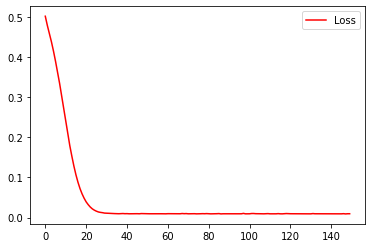

In [15]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

model = Sequential()
model.add(Dense(7, activation="relu", input_dim=1))
model.add(Dense(5, activation="relu"))
model.add(Dense(1))

model.compile(optimizer=Adam(),loss='mse')

# Generate 1000 numbers in [-5,5]
X = np.linspace(-5,5,1000)
# Gnerate y as sine X
y = np.sin(X)

# Train the model using the X, y as inputs
hist = model.fit(X, y, epochs= 150, verbose=0)

# View the loss through the training process
plt.plot(hist.history["loss"],label='Loss',color="r")
plt.legend()
plt.show()

We can now make out of sample predictions using the newly trained model

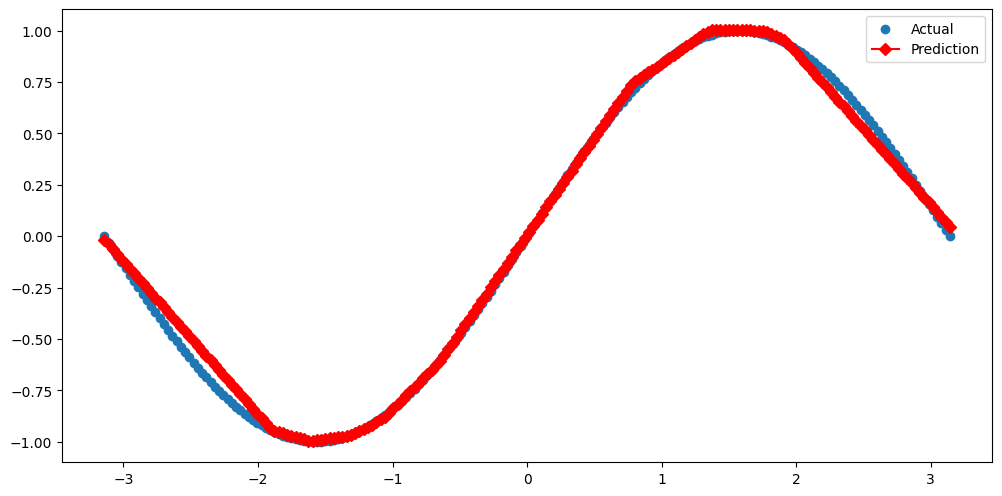

In [16]:
# Make predictions on the test set
X_test = np.linspace(-np.pi,np.pi,200)
y_test = np.sin(X_test)
pred = model.predict(X_test)

# Compare the actual y value and the prediction
fig = plt.figure(figsize=(12,6), dpi=100)
plt.scatter(X_test,y_test,label='Actual')
plt.plot(X_test,pred,label='Prediction',marker="D",color="r")
plt.legend()
plt.show()

The predictions now match the true Y values pretty well. Most importantly, the shape of the prediction is now nonlinear.

## 2. The Sigmoid Activation Function
The second most used activation function in this book (probably in most machine learning models) is the sigmoid function. It's a must in any binary classification problems. 

The Sigmoid function has the form
$$y=\frac {1} {1+e^{-x}} $$
The Sigmoid function has an S-shaped curve. It has this nice property: for any value of input $x$, the output value $y$ is always between 0 and 1. Because of this property, we use the activation function to model the probability of an event, which also falls between 0 and 1 (0 means there is no chance of the event happening, while 1 the event happening with 100% certainty).  


### 2.1. Plot the Sigmoid Function
We plot the sigmoid function when the value of $x$ ranges from -6 to 6.  

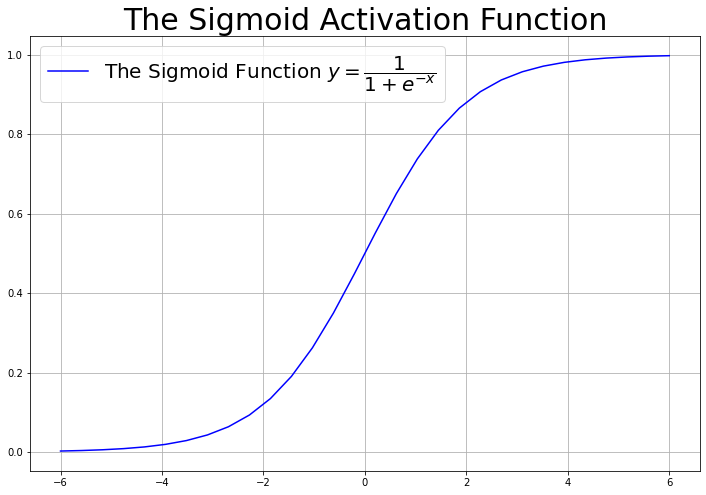

In [1]:
import numpy as np
import matplotlib.pyplot as plt

xs = np.linspace(-6,6,30)

def sigmoid(x):
    p=1/(1+np.exp(-x))
    return p

ys = sigmoid(xs)
# Plot a static picture of the sigmoid function as background
fig, ax = plt.subplots(figsize = (12,8))
plt.grid()
plt.plot(xs, ys, color = 'blue',
                label='The Sigmoid Function $y= \dfrac{1}{1 + e^{-x}}$')
plt.legend(loc="upper left", fontsize=20)    
plt.title("The Sigmoid Activation Function", fontsize=30)
plt.savefig("files/ch04/sigmoid.png")

As you can see, the value of the sigmoid function is between 0 and 1, which can be interpreted as the probability of an event. 

### 2.2. Animate the Sigmoid Function

In [1]:
import numpy as np
import matplotlib.pyplot as plt

xs = np.linspace(-6,6,31)
def sigmoid(x):
    p=1/(1+np.exp(-x))
    return p

# change the value of x and take a snapshot of each (x, y)
for i in range(31):
    # add the current position of (x,y)
    x = xs[i]
    y = sigmoid(x) 

    # Plot a static picture of the sigmoid function as background
    fig, ax = plt.subplots(figsize = (12,8), dpi=200)
    plt.grid()
    plt.plot(xs, sigmoid(xs), color = 'blue',
                    label='The Sigmoid Function $y= \dfrac{1}{1 + e^{-x}}$')
    plt.legend(loc="upper left", fontsize=20)  
    plt.xlabel("value of x", fontsize=20)
    plt.ylabel("value of $y= \dfrac{1}{1 + e^{-x}}$", fontsize=20)
    plt.title("The Sigmoid Activation Function", fontsize=30)    
    plt.scatter(x, y, color = 'red', s=150)

    # add text to explain 
    txt = ax.annotate(f'value of x: {round(x,5)}\nvalue of y: {round(y,5)}', 
                       xy = (x,y), 
                       xytext = (0.65, 0.1), 
                       textcoords = 'axes fraction', 
                       bbox = dict(boxstyle="round", fc="0.9"), 
                       arrowprops=dict(arrowstyle = '->', color = 'g', linewidth = 1), 
                       fontsize = 20)

    plt.savefig(f"files/ch04/sigmoid{i}.png")
    plt.close(fig)

# Create animation
import imageio, PIL
frames=[]
for i in range(31):
    frame=PIL.Image.open(f"files/ch04/sigmoid{i}.png") 
    frame=np.asarray(frame)
    frames.append(np.array(frame))
imageio.mimsave('files/ch04/sigmoid.gif', frames, fps=6)


If you open the file *sigmoid.gif* in your local folder, you'll see an animation as follows:<br>
<img src="https://gattonweb.uky.edu/faculty/lium/ml/sigmoid.gif" />

### 2.3. Combine the Animations for ReLU and Sigmoid Functions
Next, let's combine the two animations in one so that you can see the ReLU function and the sigmoid function side by side.

In [ ]:
import imageio
import matplotlib.pyplot as plt
import PIL
import numpy as np
frames=[]
for i in range(31):

    frame1=PIL.Image.open(f"files/ch04/relu{i}.png") 
    frame1=np.asarray(frame1)

    frame2=PIL.Image.open(f"files/ch04/sigmoid{i}.png") 
    frame2=np.asarray(frame2)

    frame=np.concatenate([frame1,frame2],axis=1)  
    frames.append(np.array(frame))
imageio.mimsave('files/ch04/relusigmoid.gif', frames, fps=5)  

You'll see an animation as follows:
<br>
<img src="https://gattonweb.uky.edu/faculty/lium/ml/relusigmoid.gif" />

## 3. The Softmax Activation Function
The third most used activation function in this book (probably in most machine learning models) is the softmax function. It's a must in any multi-class classification problems. 

The softmax function has the form
$$y(x)=\frac {e^{x}} {\sum_{k=1}^{K}e^{x_k}}$$
where $x=[x_1,x_2,...,x_K]$ and $y=[y_1,y_2,...,y_K]$ are K-element lists. The i-th element of $y$ is 
$$y_i(x)=\frac {e^{x_i}} {\sum_{k=1}^{K}e^{x_k}}$$ 
The softmax function has a nice property: each element in the output vector $y$ is always between 0 and 1. Further, elements in the output vector $y$ sum up to 1. Because of this property, we use the softmax activation function to model the probability of a multiple outcome event. Therefore, the activation function in the output layer is always the softmax function when we model multi-class classification problems.  


Next, we draw a diagram of the softmax function when the value of $x$ is a vector with four values $x=[2.3, 7.9, 0.8, 5.1]$. 

1.0


(-6.0, 6.0, -2.0, 2.0)

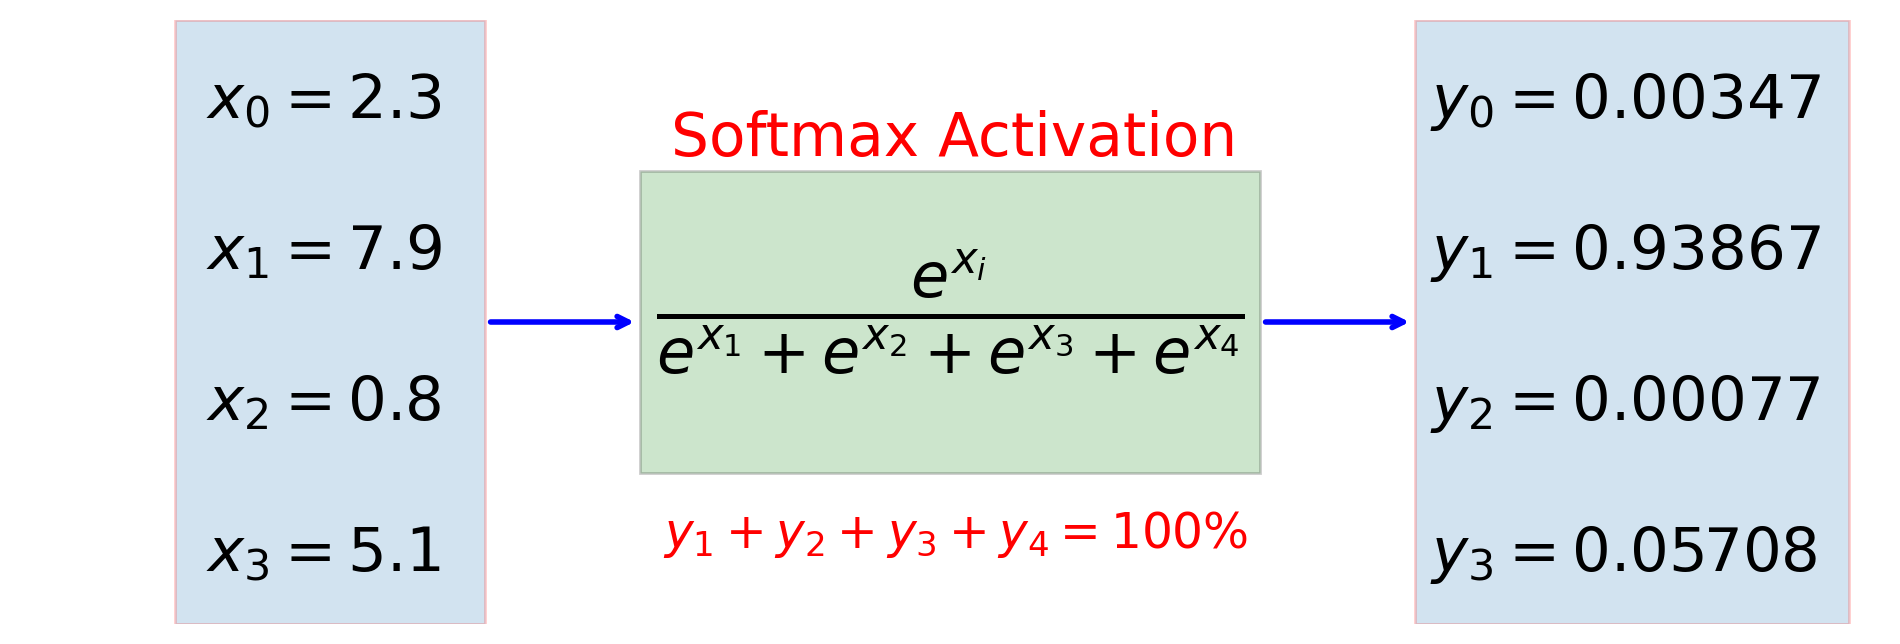

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

xs = [2.3, 7.9, 0.8, 5.1]

def softmax(x):
    xi=np.exp(x)
    return xi/xi.sum() 

ys = softmax(xs)

fig = plt.figure(figsize=(12,4), dpi=200)
ax = fig.add_subplot(111)

# add rectangle to plot
ax.add_patch(Rectangle((-5,-2), 2, 4,
             edgecolor = 'r',alpha=0.2))
ax.add_patch(Rectangle((3,-2), 2.8, 4,
             edgecolor = 'r',alpha=0.2))
ax.add_patch(Rectangle((-2,-1), 4, 2,
             edgecolor = 'k',
             facecolor = 'g',
             alpha=0.2))
plt.text(-1.9, -0.1, 
         r"$\frac {e^{x_i}} {e^{x_1}+e^{x_2}+e^{x_3}+e^{x_4}} $",
         fontsize=32, color="k")

plt.text(-1.8, 1.1, 
         r"Softmax Activation",
         fontsize=21.5, color="r")
plt.text(-1.85, -1.5, 
         r"$y_1+y_2+y_3+y_4=100\%$",
         fontsize=17.5, color="r")
for i in range(4):
    plt.text(-4.8, 1.35-i, 
        f"$x_{i}={xs[i]}$",
        fontsize=22, color="k")    
    plt.text(3.1, 1.35-i, 
        f"$y_{i}={round(ys[i],5)}$",
        fontsize=22, color="k")  

ax.annotate("",xy = (-2,0), 
                   xytext = (-3,0), 
                   arrowprops=dict(arrowstyle = '->',
                   color = 'b', linewidth = 2))
ax.annotate("",xy = (3,0), 
                   xytext = (2,0), 
                   arrowprops=dict(arrowstyle = '->',
                   color = 'b', linewidth = 2))
ax.set_xlim(-6, 6)
ax.set_ylim(-2, 2)
plt.axis("off")


As you can see, each value of the output from the softmax function is between 0 and 1. Further, the values of the elements add up to 1, i.e., 100%.

In [3]:
print(f"the sum of the elements in ys is {np.array(ys).sum()}")

the sum of the elements in ys is 1.0
